# Trading Plane

Treat fast line as x(t) and slow line as y(t)
- if (x(t), y(t)) cross y = ax+b at quandrant 1, yeild a "BUY" signal
- if (x(t), y(t)) cross y = ax+b at quandrant 3, yeild a "SELL" signal 

In [ ]:
# Run it when crypto-backtest is updated, and then restart the kernel
!pip uninstall crypto-backtest -y
!pip install git+https://github.com/BullionBear/crypto-backtest.git

In [1]:
import backtest
backtest.__version__

'develop_0.0.17+'

In [105]:
from backtest.components.core import ZipKLineIterator
from backtest.components import KLineMarket

from datetime import datetime, timezone

start_time = datetime(2023, 7, 30, tzinfo=timezone.utc).timestamp() * 1000
end_time = datetime(2023, 12, 30, tzinfo=timezone.utc).timestamp() * 1000
data_source = '/home/yite/crypto_data/binance/data'
kline_iterator = ZipKLineIterator('BTCUSDT', start_time, end_time, data_source)
# market = KLineMarket(kline_iterator)

In [106]:
df = kline_iterator.to_dataframe()

In [107]:
df.head()

,open,high,low,close,volume,open_time,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
0,29352.90,29352.92,29320.49,29348.83,270.79962,1690675200000,1690678799999,7.945249e+06,12706,124.14070,3.642055e+06,0
1,29348.82,29348.83,29324.60,29326.73,206.29523,1690678800000,1690682399999,6.051602e+06,11145,65.12700,1.910406e+06,0
2,29326.74,29326.74,29306.03,29313.34,361.91067,1690682400000,1690685999999,1.060887e+07,10702,162.83403,4.773175e+06,0
3,29313.35,29318.69,29313.34,29314.92,132.65228,1690686000000,1690689599999,3.888855e+06,8742,51.12260,1.498707e+06,0
4,29314.93,29327.43,29311.37,29325.31,351.11193,1690689600000,1690693199999,1.029424e+07,11488,185.78746,5.447125e+06,0


In [108]:
df.tail()

,open,high,low,close,volume,open_time,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
3667,42054.54,42158.65,41947.91,42116.51,1090.07786,1703876400000,1703879999999,4.586248e+07,46726,625.67774,2.632222e+07,0
3668,42116.51,42122.14,41933.90,42026.98,1103.28504,1703880000000,1703883599999,4.637611e+07,40563,562.34142,2.363622e+07,0
3669,42026.97,42240.00,41871.24,41936.22,1718.95915,1703883600000,1703887199999,7.224753e+07,60121,913.54136,3.839955e+07,0
3670,41936.23,41943.77,41300.00,41761.02,2667.72124,1703887200000,1703890799999,1.111489e+08,93066,1127.71586,4.700303e+07,0
3671,41761.03,42098.74,41761.02,42066.95,1379.65186,1703890800000,1703894399999,5.786847e+07,47609,812.51933,3.407996e+07,0


In [109]:
import talib
help(talib.MACD)

Help on function MACD in module talib._ta_lib:

MACD(real, fastperiod=-2147483648, slowperiod=-2147483648, signalperiod=-2147483648)
    MACD(real[, fastperiod=?, slowperiod=?, signalperiod=?])
    
    Moving Average Convergence/Divergence (Momentum Indicators)
    
    Inputs:
        real: (any ndarray)
    Parameters:
        fastperiod: 12
        slowperiod: 26
        signalperiod: 9
    Outputs:
        macd
        macdsignal
        macdhist



In [110]:
import pandas as pd

# Convert 'open_time' from Linux timestamp to datetime
df['date'] = pd.to_datetime(df['open_time'], unit='ms')
df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(df['close'], fastperiod=10, slowperiod=40, signalperiod=9)

In [111]:
df = df.set_index('date')

In [112]:
df.describe()

,open,high,low,close,volume,open_time,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore,macd,macdsignal,macdhist
count,3672.00000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3.672000e+03,3.672000e+03,3672.000000,3672.000000,3.672000e+03,3672.0,3625.000000,3625.000000,3625.000000
mean,32391.05473,32478.599632,32303.070790,32394.517078,1421.437860,1.697283e+12,1.697287e+12,4.700347e+07,43999.318900,694.151625,2.297218e+07,0.0,54.884522,55.177173,-0.292651
std,6187.26658,6217.261732,6154.163077,6189.123312,1461.733604,3.816574e+09,3.816574e+09,4.879863e+07,35065.872036,744.023652,2.479718e+07,0.0,295.285513,282.001154,77.711242
min,25020.66000,25133.380000,24901.000000,25020.660000,129.758990,1.690675e+12,1.690679e+12,3.488263e+06,8360.000000,51.122600,1.498707e+06,0.0,-1111.035245,-1000.933019,-336.139175
25%,26796.61250,26856.847500,26734.170000,26796.612500,644.561627,1.693979e+12,1.693983e+12,1.943005e+07,22422.000000,302.917798,9.062438e+06,0.0,-62.929732,-60.049359,-32.694936
50%,29410.56000,29433.080000,29381.555000,29411.150000,1006.574835,1.697283e+12,1.697287e+12,3.257096e+07,34810.500000,485.181170,1.557328e+07,0.0,10.635355,13.391888,-2.332478
75%,37226.10000,37320.257500,37106.895000,37227.855000,1672.513725,1.700587e+12,1.700590e+12,5.712090e+07,53878.000000,816.923158,2.807415e+07,0.0,163.585513,164.387873,27.129716
max,44527.34000,44700.000000,44239.020000,44527.340000,27563.363880,1.703891e+12,1.703894e+12,7.885094e+08,721006.000000,14352.112210,4.108348e+08,0.0,1792.398463,1655.174438,581.868519


In [113]:
import numpy as np
df["log_return"] = np.log(df['close'] / df['close'].shift(1))
df = df.dropna()
df["log_return"].head()



date
2023-07-31 23:00:00    0.000762
2023-08-01 00:00:00    0.001767
2023-08-01 01:00:00   -0.002853
2023-08-01 02:00:00   -0.009197
2023-08-01 03:00:00   -0.003400
Name: log_return, dtype: float64

<Axes: xlabel='date'>

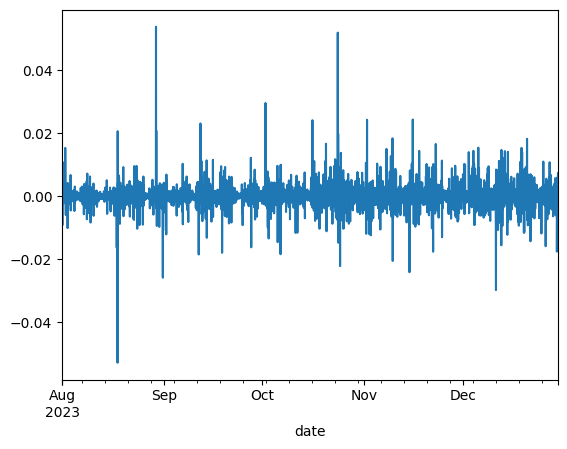

In [114]:
df["log_return"].plot()

In [89]:
df["log_return"].sum()

0.3647516227059714

In [61]:
a = 1
b = 0

df['Signal'] = 0  # Neutral/hold signal

# Buy signal: MACD crosses above signal line
df.loc[(df['macd'] > a * df['macdsignal'] + b) & (df['macd'] > 0) & (df['macdsignal'] > 0), 'Signal'] = 1  # 1 for buy

# Sell signal: MACD crosses below signal line
df.loc[(df['macd'] < a * df['macdsignal'] + b) & (df['macd'] < 0) & (df['macdsignal'] < 0), 'Signal'] = -1  # -1 for sell

# Optionally, create a 'Strategy' column to interpret the signals as 'Buy', 'Sell', or 'Hold'
df['Strategy'] = df['Signal'].map({1: 'Buy', -1: 'Sell', 0: 'Hold'})



In [62]:
df['Strategy'].head()

date
2023-02-02 23:00:00    Hold
2023-02-03 00:00:00    Hold
2023-02-03 01:00:00    Hold
2023-02-03 02:00:00    Hold
2023-02-03 03:00:00    Hold
Name: Strategy, dtype: object

In [63]:
# Apply strategy
portfolio = {'BTC': 1, 'USDT': df["open"].iloc[0]}
eps = 10
percentage = 1.00
portfolios = []
for idx, event in df.iterrows():
    price = event["close"]
    if event["Strategy"] == "Hold":
        pass
    elif portfolio['USDT'] > eps and event["Strategy"] == "Buy":
        usdt_amt = portfolio['USDT'] * percentage
        btc_amt = usdt_amt / price
        portfolio['BTC'] += btc_amt
        portfolio['USDT'] -= usdt_amt
    elif portfolio['BTC'] > eps / price and event["Strategy"] == "Sell":
        btc_amt = portfolio['BTC'] * percentage
        usdt_amt = btc_amt * price
        portfolio['BTC'] -= btc_amt
        portfolio['USDT'] += usdt_amt
    portfolios.append({"open_time": event["open_time"]} | portfolio | {"close": portfolio["BTC"] * price + portfolio["USDT"]}) # Python3.9 syntax
portfolio = pd.DataFrame(portfolios)

In [64]:
portfolio.tail()

,open_time,BTC,USDT,close
4243,1690657200000,1.900703,0.0,55762.866061
4244,1690660800000,1.900703,0.0,55795.577161
4245,1690664400000,1.900703,0.0,55782.006141
4246,1690668000000,1.900703,0.0,55790.122143
4247,1690671600000,1.900703,0.0,55791.148523


In [65]:
portfolio["log_return"] = np.log(portfolio['close'] / portfolio['close'].shift(1))
portfolio = portfolio.dropna()
portfolio["log_return"].head()

1    0.001358
2    0.000047
3   -0.001693
4    0.001248
5   -0.000371
Name: log_return, dtype: float64

In [18]:
portfolio.to_csv("best_buy_and_sell.csv")

In [66]:
r = np.mean(portfolio["log_return"]) * 365 * 24
v = np.std(portfolio["log_return"]) * np.sqrt(365 * 24)
print(f"annualized return: ", r)
print(f"annualized volatility: ", v)
print(f"sharpe ratio: ", r / v)

annualized return:  0.35167271397808414
annualized volatility:  0.36187311281605444
sharpe ratio:  0.9718122223599538


In [67]:
def objective(df: pd.DataFrame, x_col: str, y_col: str, a: float, b: float):
    df = df.copy()
    df['Signal'] = 0  # Neutral/hold signal
    # Buy signal: MACD crosses above signal line
    df.loc[(df[y_col] > a * df[x_col] + b) & (df[y_col] > 0) & (df[x_col] > 0), 'Signal'] = 1  # 1 for buy
    df.loc[(df[y_col] < a * df[x_col] + b) & (df[y_col] < 0) & (df[x_col] < 0), 'Signal'] = -1  # -1 for sell
    df['Strategy'] = df['Signal'].map({1: 'Buy', -1: 'Sell', 0: 'Hold'})
    # Apply strategy
    portfolio = {'BTC': 1, 'USDT': df["open"].iloc[0]}
    eps = 10
    percentage = 0.5
    portfolios = []
    for idx, event in df.iterrows():
        price = event["close"]
        if event["Strategy"] == "Hold":
            pass
        elif portfolio['USDT'] > eps and event["Strategy"] == "Buy":
            usdt_amt = portfolio['USDT'] * percentage
            btc_amt = usdt_amt / price
            portfolio['BTC'] += btc_amt
            portfolio['USDT'] -= usdt_amt
        elif portfolio['BTC'] > eps / price and event["Strategy"] == "Sell":
            btc_amt = portfolio['BTC'] * percentage
            usdt_amt = btc_amt * price
            portfolio['BTC'] -= btc_amt
            portfolio['USDT'] += usdt_amt
        portfolios.append({"open_time": event["open_time"]} | portfolio | {"close": portfolio["BTC"] * price + portfolio["USDT"]}) # Python3.9 syntax
    portfolio = pd.DataFrame(portfolios)
    portfolio["log_return"] = np.log(portfolio['close'] / portfolio['close'].shift(1))
    portfolio = portfolio.dropna()
    r = np.mean(portfolio["log_return"])
    # v = np.std(portfolio["log_return"])
    v = np.std(portfolio[portfolio["log_return"] < 0]["log_return"])
    return r, v  

In [68]:
param = {"a": -1, "b": -1, "target":-np.inf, "return": -1, "volatility": 0}
for theta in np.linspace(-7*np.pi/8, 7*np.pi/8, 8):
    a = np.tan(theta)
    for b in np.linspace(-3, 3, 7):
        r, v = objective(df, 'macd', 'macdsignal', a, b) # try to switch macd and macdsignal
        r *= 365 * 24
        v *= np.sqrt(365 * 24)
        # print(a, b, r, v)
        obj = r
        if obj > param["target"]:
            param["target"] = obj
            param["a"] = a
            param["b"] = b
            param["return"] = r
            param["volatility"] = v 
print(param)
        

{'a': 0.41421356237309515, 'b': 3.0, 'target': 0.5395379914559378, 'return': 0.5395379914559378, 'volatility': 0.31498733154841746}


In [90]:
a = 0.4142
b = 3.0

df['Signal'] = 0  # Neutral/hold signal

# Buy signal: MACD crosses above signal line
df.loc[(df['macdsignal'] > a * df['macd'] + b) & (df['macd'] > 0) & (df['macdsignal'] > 0), 'Signal'] = 1  # 1 for buy

# Sell signal: MACD crosses below signal line
df.loc[(df['macdsignal'] < a * df['macd'] + b) & (df['macd'] < 0) & (df['macdsignal'] < 0), 'Signal'] = -1  # -1 for sell

# Optionally, create a 'Strategy' column to interpret the signals as 'Buy', 'Sell', or 'Hold'
df['Strategy'] = df['Signal'].map({1: 'Buy', -1: 'Sell', 0: 'Hold'})

In [91]:
# Apply strategy
portfolio = {'BTC': 1, 'USDT': df["open"].iloc[0]}
eps = 10
percentage = 1.00
portfolios = []
for idx, event in df.iterrows():
    price = event["close"]
    if event["Strategy"] == "Hold":
        pass
    elif portfolio['USDT'] > eps and event["Strategy"] == "Buy":
        usdt_amt = portfolio['USDT'] * percentage
        btc_amt = usdt_amt / price
        portfolio['BTC'] += btc_amt
        portfolio['USDT'] -= usdt_amt
    elif portfolio['BTC'] > eps / price and event["Strategy"] == "Sell":
        btc_amt = portfolio['BTC'] * percentage
        usdt_amt = btc_amt * price
        portfolio['BTC'] -= btc_amt
        portfolio['USDT'] += usdt_amt
    portfolios.append({"open_time": event["open_time"]} | portfolio | {"close": portfolio["BTC"] * price + portfolio["USDT"]}) # Python3.9 syntax
portfolio = pd.DataFrame(portfolios)

In [92]:
portfolio["log_return"] = np.log(portfolio['close'] / portfolio['close'].shift(1))
portfolio = portfolio.dropna()
portfolio["log_return"].head()

1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: log_return, dtype: float64

In [93]:
r = np.mean(portfolio["log_return"]) * 365 * 24
v = np.std(portfolio["log_return"]) * np.sqrt(365 * 24)
print(f"annualized return: ", r)
print(f"annualized volatility: ", v)
print(f"sharpe ratio: ", r / v)

annualized return:  0.5482547025593397
annualized volatility:  0.28005148485635517
sharpe ratio:  1.9576925394291416


In [94]:
portfolio

,open_time,BTC,USDT,close,log_return
1,1690848000000,0.0,58442.250000,58442.250000,0.0
2,1690851600000,0.0,58442.250000,58442.250000,0.0
3,1690855200000,0.0,58442.250000,58442.250000,0.0
4,1690858800000,0.0,58442.250000,58442.250000,0.0
5,1690862400000,0.0,58442.250000,58442.250000,0.0
...,...,...,...,...,...
3620,1703876400000,0.0,73321.311238,73321.311238,0.0
3621,1703880000000,0.0,73321.311238,73321.311238,0.0
3622,1703883600000,0.0,73321.311238,73321.311238,0.0
3623,1703887200000,0.0,73321.311238,73321.311238,0.0


In [95]:
activities = pd.merge(df, portfolio, on='open_time', how='inner')
# Convert 'open_time' from Linux timestamp to datetime
activities['date'] = pd.to_datetime(activities['open_time'], unit='ms')
activities = activities.set_index('date')
activities.head()

,open,high,low,close_x,volume,open_time,close_time,quote_volume,count,taker_buy_volume,...,macd,macdsignal,macdhist,log_return_x,Signal,Strategy,BTC,USDT,close_y,log_return_y
date,,,,,,,,,,,,,,,,,,,,,
2023-08-01 00:00:00,29232.26,29288.20,29210.99,29283.96,720.85463,1690848000000,1690851599999,2.107947e+07,17954,341.10168,...,-43.915221,-28.063309,-15.851912,0.001767,-1,Sell,0.0,58442.25,58442.25,0.0
2023-08-01 01:00:00,29283.96,29347.16,29169.37,29200.54,973.96678,1690851600000,1690855199999,2.850160e+07,26866,457.28798,...,-48.849991,-32.220645,-16.629345,-0.002853,-1,Sell,0.0,58442.25,58442.25,0.0
2023-08-01 02:00:00,29200.53,29218.74,28720.00,28933.22,5165.01282,1690855200000,1690858799999,1.495571e+08,88074,2152.09462,...,-87.820953,-43.340707,-44.480246,-0.009197,-1,Sell,0.0,58442.25,58442.25,0.0
2023-08-01 03:00:00,28933.22,28951.12,28813.86,28835.00,1813.18905,1690858800000,1690862399999,5.238132e+07,37227,797.90100,...,-130.438967,-60.760359,-69.678608,-0.003400,-1,Sell,0.0,58442.25,58442.25,0.0
2023-08-01 04:00:00,28835.01,28928.34,28803.50,28866.00,1752.08768,1690862400000,1690865999999,5.056954e+07,31403,832.45833,...,-158.326255,-80.273538,-78.052717,0.001075,-1,Sell,0.0,58442.25,58442.25,0.0


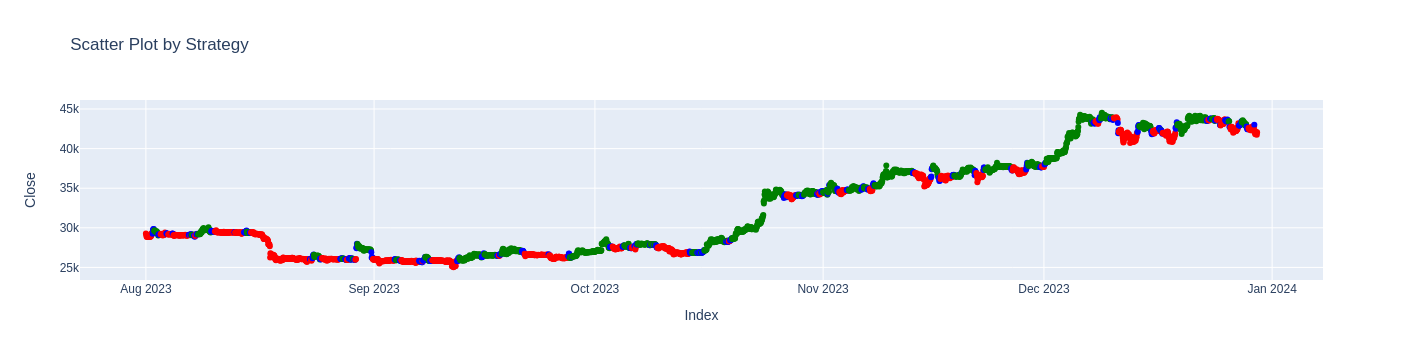

In [101]:
import pandas as pd
import plotly.graph_objects as go

# Define colors based on strategy
colors = activities['Strategy'].map({'Buy': 'green', 'Sell': 'red'}).fillna('blue')

# Create scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=activities.index,
    y=activities['close_x'],
    mode='markers',  # Use markers to create a scatter plot
    marker=dict(color=colors),  # Assign colors based on strategy
    # text=df['Strategy'],  # Optionally, display the strategy as hover text
))

# Update layout if needed
fig.update_layout(
    title="Scatter Plot by Strategy",
    xaxis_title="Index",
    yaxis_title="Close",
    legend_title="Strategy",
)

# Show plot
fig.show()


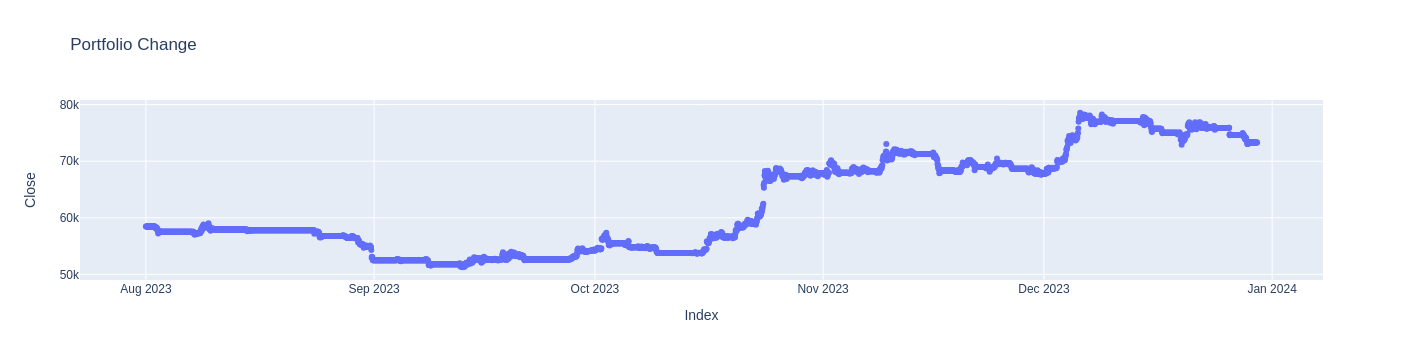

In [102]:
import pandas as pd
import plotly.graph_objects as go


# Create scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=activities.index,
    y=activities['close_y'],
    mode='markers',  # Use markers to create a scatter plot
    # text=df['Strategy'],  # Optionally, display the strategy as hover text
))

# Update layout if needed
fig.update_layout(
    title="Portfolio Change",
    xaxis_title="Index",
    yaxis_title="Close",
    legend_title="Strategy",
)

# Show plot
fig.show()

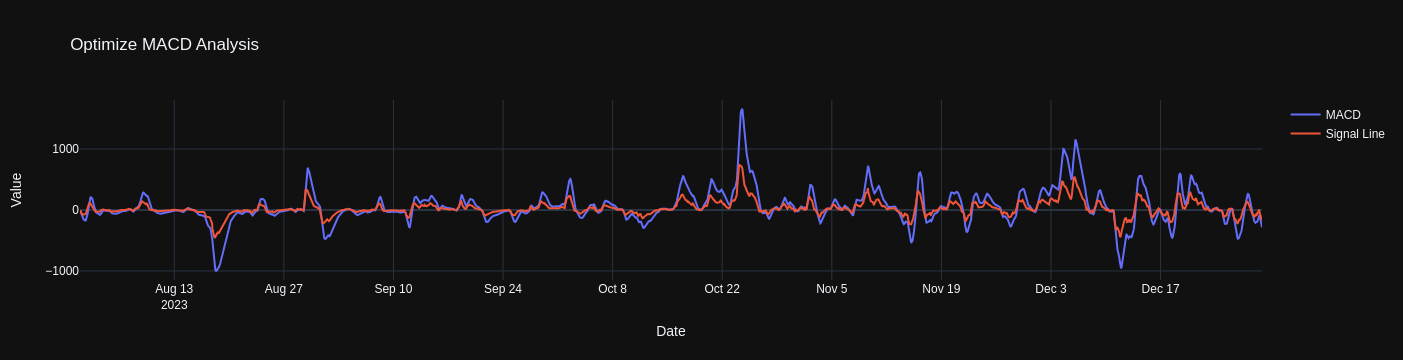

In [119]:
fig = go.Figure()
    
# Add MACD line (slow line)
fig.add_trace(go.Scatter(x=df.index, y=df['macdsignal'], mode='lines', name='MACD'))
# Add signal line (fast line)
fig.add_trace(go.Scatter(x=df.index, y=0.4142 * df['macd'] + 3.0, mode='lines', name='Signal Line'))

# Update layout
fig.update_layout(title=f'Optimize MACD Analysis',
                  xaxis_title='Date',
                  yaxis_title='Value',
                  template='plotly_dark')

fig.show()